# In this project  we will try to see if we can predict the Avocado’s Average Price based on different features. 
'''The variables of the dataset are the following:

    Categorical variables: ‘region’,’type’
    Date: ‘Date’
    Numerical variables:‘Unamed: 0’,’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
    Target variable :‘AveragePrice’'''

'''Column Description:

    ‘Unamed: 0’ : Its just a useless index feature that will be removed in the notebook
    ’Total Volume’ : Total sales volume of avocados
    ‘4046’ : Total sales volume of Small/Medium Hass Avocado / Total number of avocados with PLU 4046 sold
    ‘4225’ : Total sales volume of Large Hass Avocado / Total number of avocados with PLU 4225 sold
    ‘4770’ : Total sales volume of Extra Large Hass Avocado / Total number of avocados with PLU 4770 sold
    ‘Total Bags’: Total number of Bags sold
    ‘Small Bags’: Total number of Small Bags sold
    ’Large Bags’: Total number of Large Bags sold
    ‘XLarge Bags’: Total number of XLarge Bags sold'''


In [1]:
# Import important libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [3]:
data=pd.read_csv('avocado.csv')

In [4]:
data.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are observed

In [6]:
data.shape

(18249, 14)

Dataset has 18249 rows and 14 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


All the columns are having non -null values

In [8]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In our data the column:

Unnamed: 0 :- it is nominal variable that is not needed.

All other  columns are dependents may be while it is  independent feature

ALL the columns are continous. And our label is continous variable too, hence it a regression problem.

In [9]:
data=data.drop(['Unnamed: 0'],axis=1)

In [10]:
data.shape

(18249, 13)

Unnamed feature is not that important so we have dropped it

In [11]:
# Renaming three columns with number into a meaningful name
data=data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
# convert date into datetime 
data['Date']=pd.to_datetime(data['Date'])

data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [13]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Converting the Date column into three different columns using lambda funtion 

In [14]:
# We need to manage the categorical features

In [15]:
data['type'].nunique()

2

In [16]:
data['region'].nunique()

54

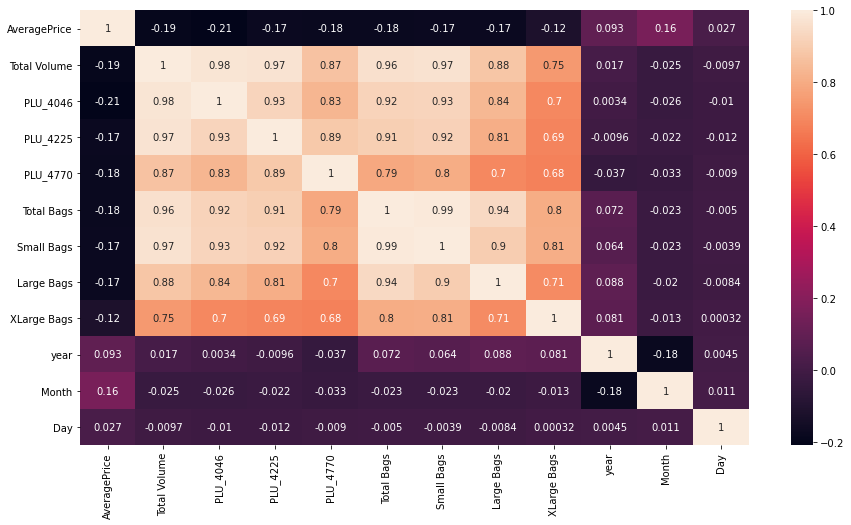

In [17]:
# Finding the correlation between the feature

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the above heatmap its clearly seen that all the features are not correlated with average price 
but most of them are correlated to each other.

In [18]:
#  Create dummy variable using One Hot encoding for 54 regions is complex so better we drop this column 

data_Price=pd.get_dummies(data.drop(['region','Date'],axis=1),drop_first=True)


In [19]:
data_Price.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


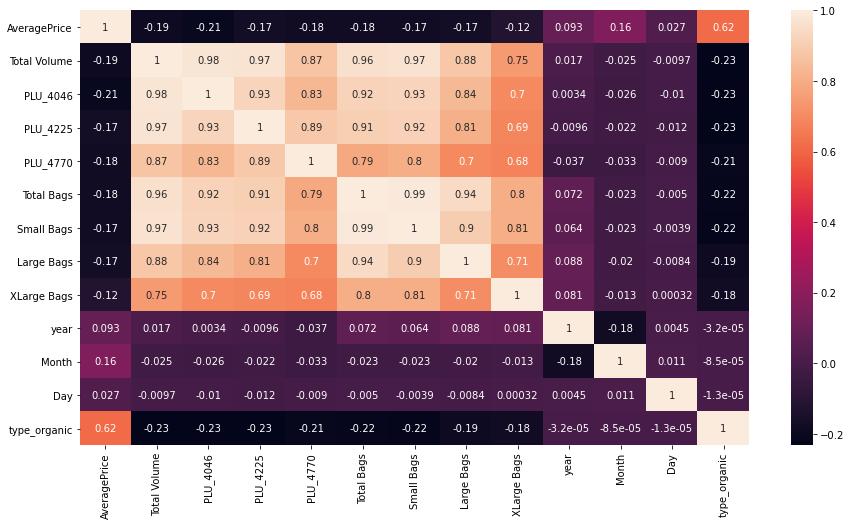

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(data_Price.corr(),annot=True)
plt.show()

# EDA

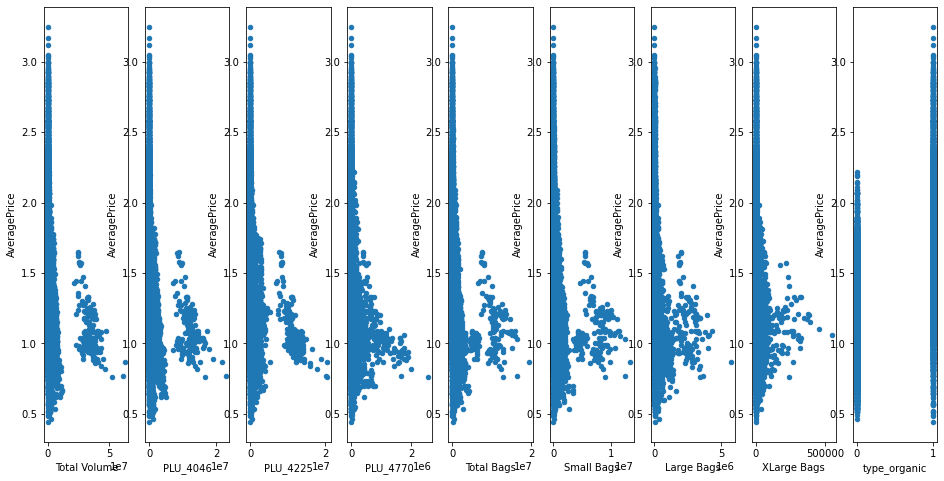

In [21]:
fig,axs=plt.subplots(1,9)
data_Price.plot(kind='scatter',x='Total Volume',y='AveragePrice',ax=axs[0],figsize=(16,8))
data_Price.plot(kind='scatter',x='PLU_4046',y='AveragePrice',ax=axs[1])
data_Price.plot.scatter(x='PLU_4225',y='AveragePrice',ax=axs[2])
data_Price.plot.scatter(x='PLU_4770',y='AveragePrice',ax=axs[3])
data_Price.plot.scatter(x='Total Bags',y='AveragePrice',ax=axs[4])
data_Price.plot.scatter(x='Small Bags',y='AveragePrice',ax=axs[5])
data_Price.plot.scatter(x='Large Bags',y='AveragePrice',ax=axs[6])
data_Price.plot.scatter(x='XLarge Bags',y='AveragePrice',ax=axs[7])
data_Price.plot.scatter(x='type_organic',y='AveragePrice',ax=axs[8])
plt.show()

THe scatter plot shows that there is barely any relation among Average price and other features


# Let us see how other featues are related to each other

<AxesSubplot:>

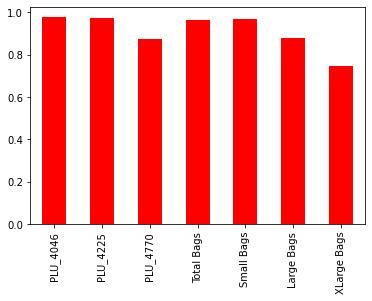

In [22]:
data_Price[['PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].corrwith(data['Total Volume']).plot(kind='bar',color='red')

 Observation: Total Volume is highly dependent on all other features

<AxesSubplot:>

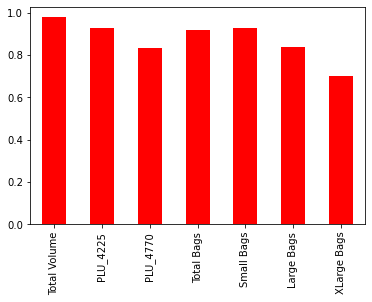

In [23]:
data_Price[['Total Volume','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].corrwith(data['PLU_4046']).plot(kind='bar',color='red')

Observation: PLU_4046 is highly dependent on all other features

<AxesSubplot:>

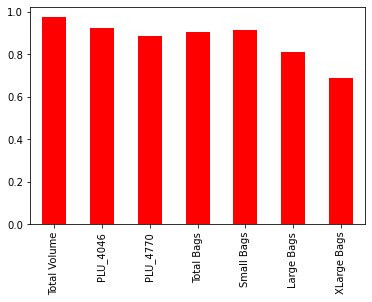

In [24]:
data_Price[['Total Volume','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].corrwith(data['PLU_4225']).plot(kind='bar',color='red')

Observation: PLU_4225 is highly dependent on all other features

<AxesSubplot:>

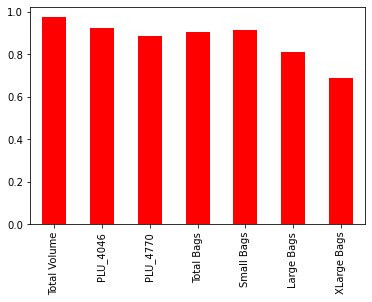

In [25]:
data_Price[['Total Volume','PLU_4046','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].corrwith(data['PLU_4225']).plot(kind='bar',color='red')

Observation: PLU_4225 is highly dependent on all other features

<AxesSubplot:>

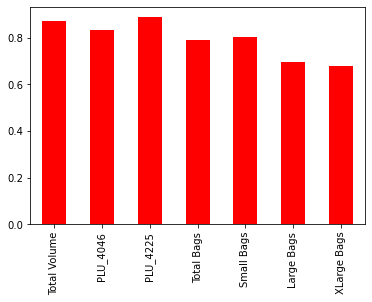

In [26]:
data_Price[['Total Volume','PLU_4046','PLU_4225','Total Bags','Small Bags','Large Bags','XLarge Bags']].corrwith(data['PLU_4770']).plot(kind='bar',color='red')

Observation: PLU_4770 is highly dependent on all other features

<AxesSubplot:>

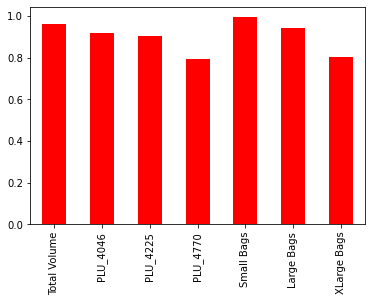

In [27]:
data_Price[['Total Volume','PLU_4046','PLU_4225','PLU_4770','Small Bags','Large Bags','XLarge Bags']].corrwith(data['Total Bags']).plot(kind='bar',color='red')

Observation: Total bags is highly dependent on all other features

So its clear that all features are related to each other rather than on label variable i.e Average Price

# Model Building

In [28]:
Y=data_Price['AveragePrice']
X=data_Price.drop('AveragePrice',axis=1)

In [29]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [31]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()


In [32]:
alg=[Linear,DecisionTree,RandomForest,knn]
acc_models={}
for model in alg:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print("Model Name:",model) 
    print('Accuracy ::',{round(r2_score(Y_test,Y_pred)*100,1)})
    print('Mean Absolute Error(MAE) is::',{mean_absolute_error(Y_test,Y_pred)})
    print('Mean Squared Error(MSE) ::',{mean_squared_error(Y_test,Y_pred)})
    print('Root Mean Squared Error is ::',{np.sqrt(mean_squared_error(Y_test,Y_pred))})
    print("--------------------------------------------------------")


Model Name: LinearRegression()
Accuracy :: {43.3}
Mean Absolute Error(MAE) is:: {0.23297133291661806}
Mean Squared Error(MSE) :: {0.0910880280538594}
Root Mean Squared Error is :: {0.301807932390551}
--------------------------------------------------------
Model Name: DecisionTreeRegressor()
Accuracy :: {71.6}
Mean Absolute Error(MAE) is:: {0.13736712328767123}
Mean Squared Error(MSE) :: {0.0456938904109589}
Root Mean Squared Error is :: {0.21376129306064487}
--------------------------------------------------------
Model Name: RandomForestRegressor()
Accuracy :: {86.7}
Mean Absolute Error(MAE) is:: {0.1009666301369863}
Mean Squared Error(MSE) :: {0.021302490799999994}
Root Mean Squared Error is :: {0.145953728284001}
--------------------------------------------------------
Model Name: KNeighborsRegressor()
Accuracy :: {62.7}
Mean Absolute Error(MAE) is:: {0.18332986301369864}
Mean Squared Error(MSE) :: {0.05996486246575342}
Root Mean Squared Error is :: {0.24487723958292534}
----------

In [33]:
acc_models

{LinearRegression(): 43.3,
 DecisionTreeRegressor(): 71.6,
 RandomForestRegressor(): 86.7,
 KNeighborsRegressor(): 62.7}

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

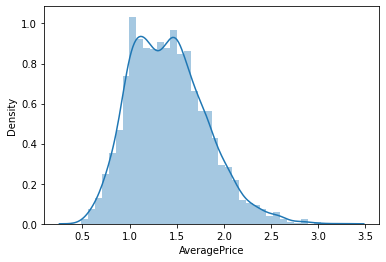

In [34]:
sns.distplot((Y_test))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

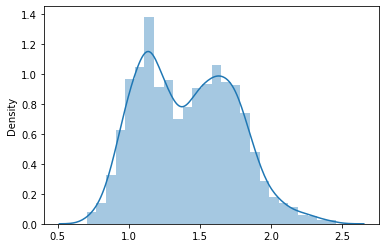

In [35]:
sns.distplot((Y_pred))

Random Regressor giving us best score

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


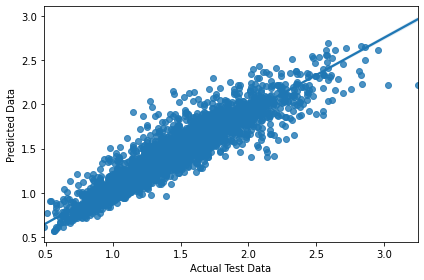

In [36]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [37]:
df=pd.DataFrame({'Y Test':Y_test,'Pred':Y_pred},columns=['Y Test','Pred'])
df.head()

,Y Test,Pred
8604,0.82,0.9511
2608,0.97,1.0076
14581,1.44,1.4029
4254,0.97,0.9106
16588,1.45,1.4450


In [38]:
X_train,Y_train,X_test,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=80)
estimator=RandomForestRegressor()

param_grid={
    "n_estimators":[10,20,30],
    "max_features":["auto", "sqrt", "log2"],
    "min_samples_split":[2,4,8],
    "bootstrap":[True,False]    
}
gridsearch=GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

gridsearch.fit(X_scaled,Y)
print(gridsearch.best_params_ , gridsearch.best_score_)

{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30} 0.2801133354027106


In [39]:
RandomForest=RandomForestRegressor(n_estimators=30,max_features='log2',min_samples_split=4)
RandomForest.fit(X_scaled,Y)
Y_pred=RandomForest.predict(X_scaled)
r2_sc=r2_score(Y,Y_pred)
print("r2_score:",r2_sc*100)


r2_score: 97.26839526490801


# The r2 score has incresed from 86 to 97  after hypertuning

# We will be building model on the basis of region now

In [40]:
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Data Processing

In [46]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['region']=label.fit_transform(data['region'])

In [47]:
data.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11,29


In [48]:
data_region=pd.get_dummies(data)
data_region.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,1,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,1,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,1,0


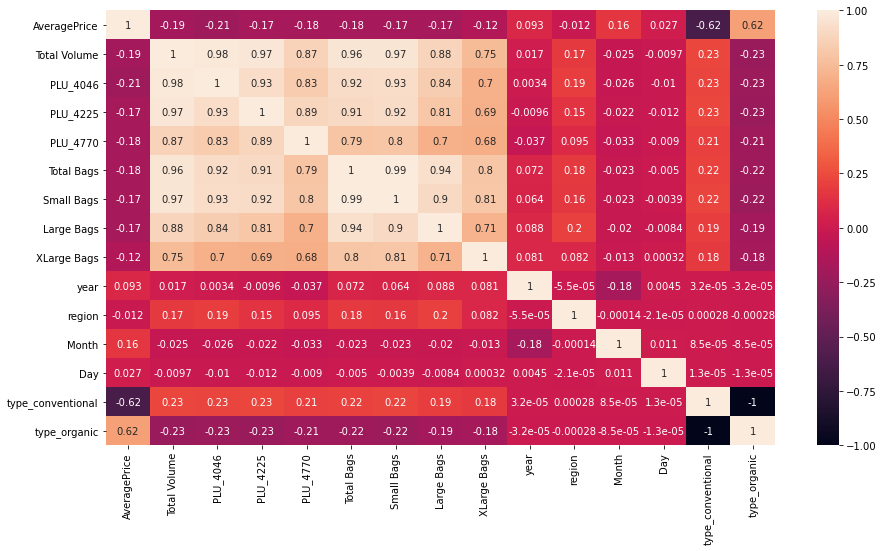

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(data_region.corr(),annot=True)
plt.show()

It seem even region is not correlated to any of the features.

Its clear from the heatmap that all other featues(Total Volume 	PLU_4046 	PLU_4225 	PLU_4770 	Total Bags 	Small Bags 	Large Bags 	XLarge Bags) are highly correlated to each other

# Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn .metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve


In [51]:
data_region.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,1,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,1,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,1,0


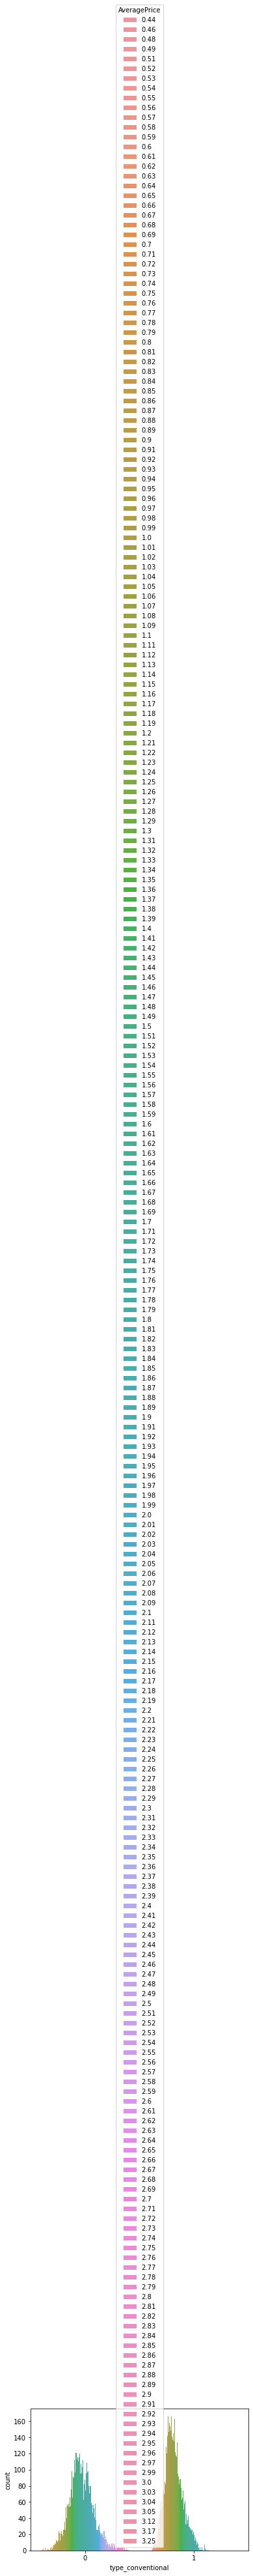

In [54]:
#plt.figure(figsize=(10,10))
sns.countplot(x='type_conventional',hue='AveragePrice',data=data_region)
plt.show()




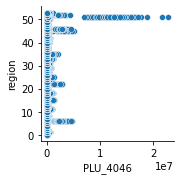

In [55]:
# Relation with Region and PLU 4046 selling
sns.pairplot(data_region,x_vars='PLU_4046',y_vars='region',kind='scatter')
plt.show()

Small /Medium Hass avocado is sold maximum between 45 to 54 region

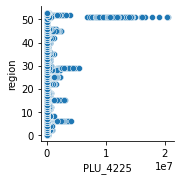

In [56]:
# Relation with Region and PLU 4225 selling
sns.pairplot(data_region,x_vars='PLU_4225',y_vars='region',kind='scatter')
plt.show()

Large size Hass avocado is sold maximum between 45 to 54 region

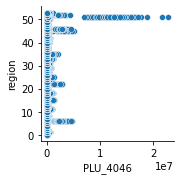

In [57]:
# Relation with Region and PLU 4046 selling
sns.pairplot(data_region,x_vars='PLU_4046',y_vars='region',kind='scatter')
plt.show()

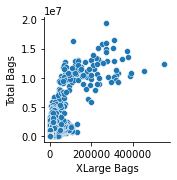

In [58]:
sns.pairplot(data_region,x_vars='XLarge Bags',y_vars='Total Bags',kind='scatter')
plt.show()

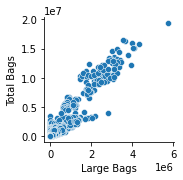

In [59]:

sns.pairplot(data_region,x_vars='Large Bags',y_vars='Total Bags',kind='scatter')
plt.show()

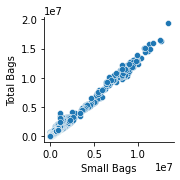

In [60]:
# Relation with Region and PLU 4046 selling
sns.pairplot(data_region,x_vars='Small Bags',y_vars='Total Bags',kind='scatter')
plt.show()


Small bags are highly correlated to Total no of bags as compared with large and xlarge bags

In [61]:
# assinging the values of x and y for training and testing
x_c=data_region.drop(columns=['region','Date'],axis=1)# independent variables
y_c=data_region['region']  # dependent Variables
print(x_c.shape)
print(y_c.shape)

(18249, 14)
(18249,)


In [62]:

xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=42,test_size=0.33)

print('X-train shape:',xc_train.shape)
print('Y-train shape:',yc_train.shape)
print('X-test shape:',xc_test.shape)
print('Y-test shape:',yc_test.shape)

X-train shape: (12226, 14)
Y-train shape: (12226,)
X-test shape: (6023, 14)
Y-test shape: (6023,)


In [63]:
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [64]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pred_c=i_c.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print (" Accuracy score to random state:",r_state,"is",acc_score)
        print('---------------------')
        if acc_score > max_accuracy_score:
            max_accuracy_score=acc_score
            final_state=r_state
            final_model=i_c

print("Final accuracy at random state:",final_state,'is',max_accuracy_score,'with model:',final_model)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 40 is 0.12419060268968952
---------------------
 Accuracy score to random state: 40 is 0.7876473518180309
---------------------
 Accuracy score to random state: 40 is 0.6466876971608833
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 41 is 0.13415241573966463
---------------------
 Accuracy score to random state: 41 is 0.7748630250705628
---------------------
 Accuracy score to random state: 41 is 0.6450273949858875
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 42 is 0.12634899551718412
---------------------
 Accuracy score to random state: 42 is 0.7863191100780342
---------------------
 Accuracy score to random state: 42 is 0.6463556367258841
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 43 is 0.13083181138967293
---------------------
 Accuracy score to random state: 43 is 0.7788477502905529
---------------------
 Accuracy score to random state: 43 is 0.6395483978084011
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 44 is 0.1374730200896563
---------------------
 Accuracy score to random state: 44 is 0.7796779013780508
---------------------
 Accuracy score to random state: 44 is 0.6518346339033704
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 45 is 0.12601693508218495
---------------------
 Accuracy score to random state: 45 is 0.7903038352980243
---------------------
 Accuracy score to random state: 45 is 0.6495102108583762
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 46 is 0.13265814378216836
---------------------
 Accuracy score to random state: 46 is 0.786817200730533
---------------------
 Accuracy score to random state: 46 is 0.6438651834633904
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 47 is 0.13963141291715092
---------------------
 Accuracy score to random state: 47 is 0.7864851402955337
---------------------
 Accuracy score to random state: 47 is 0.6470197575958825
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 48 is 0.1290054789971775
---------------------
 Accuracy score to random state: 48 is 0.7913000166030217
---------------------
 Accuracy score to random state: 48 is 0.6510044828158725
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 49 is 0.1266810559521833
---------------------
 Accuracy score to random state: 49 is 0.7874813216005313
---------------------
 Accuracy score to random state: 49 is 0.6510044828158725
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 50 is 0.14046156400464885
---------------------
 Accuracy score to random state: 50 is 0.788809563340528
---------------------
 Accuracy score to random state: 50 is 0.6382201560684044
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 51 is 0.1353146272621617
---------------------
 Accuracy score to random state: 51 is 0.7947866511705131
---------------------
 Accuracy score to random state: 51 is 0.6460235762908849
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 52 is 0.13398638552216505
---------------------
 Accuracy score to random state: 52 is 0.7844927776855388
---------------------
 Accuracy score to random state: 52 is 0.6446953345508882
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 53 is 0.14145774530964636
---------------------
 Accuracy score to random state: 53 is 0.7775195085505562
---------------------
 Accuracy score to random state: 53 is 0.6553212684708617
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 54 is 0.1323260833471692
---------------------
 Accuracy score to random state: 54 is 0.7959488626930101
---------------------
 Accuracy score to random state: 54 is 0.6521666943383696
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 55 is 0.1333222646521667
---------------------
 Accuracy score to random state: 55 is 0.7903038352980243
---------------------
 Accuracy score to random state: 55 is 0.6436991532458908
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 56 is 0.13514859704466212
---------------------
 Accuracy score to random state: 56 is 0.7864851402955337
---------------------
 Accuracy score to random state: 56 is 0.6395483978084011
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 57 is 0.130001660302175
---------------------
 Accuracy score to random state: 57 is 0.7844927776855388
---------------------
 Accuracy score to random state: 57 is 0.6493441806408766
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 58 is 0.12850738834467873
---------------------
 Accuracy score to random state: 58 is 0.7838286568155405
---------------------
 Accuracy score to random state: 58 is 0.6465216669433836
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 59 is 0.130001660302175
---------------------
 Accuracy score to random state: 59 is 0.7803420222480492
---------------------
 Accuracy score to random state: 59 is 0.6544911173833637
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 60 is 0.13083181138967293
---------------------
 Accuracy score to random state: 60 is 0.7803420222480492
---------------------
 Accuracy score to random state: 60 is 0.6501743317283746
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 61 is 0.13581271791466046
---------------------
 Accuracy score to random state: 61 is 0.7828324755105429
---------------------
 Accuracy score to random state: 61 is 0.6483479993358792
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 62 is 0.14145774530964636
---------------------
 Accuracy score to random state: 62 is 0.7849908683380376
---------------------
 Accuracy score to random state: 62 is 0.6553212684708617
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 63 is 0.14245392661464387
---------------------
 Accuracy score to random state: 63 is 0.7903038352980243
---------------------
 Accuracy score to random state: 63 is 0.6516686036858709
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 64 is 0.13614477834965963
---------------------
 Accuracy score to random state: 64 is 0.7967790137805081
---------------------
 Accuracy score to random state: 64 is 0.6534949360783663
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 65 is 0.12734517682218163
---------------------
 Accuracy score to random state: 65 is 0.7873152913830317
---------------------
 Accuracy score to random state: 65 is 0.650008301510875
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 66 is 0.13249211356466878
---------------------
 Accuracy score to random state: 66 is 0.7896397144280259
---------------------
 Accuracy score to random state: 66 is 0.6546571476008634
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 67 is 0.13398638552216505
---------------------
 Accuracy score to random state: 67 is 0.7818362942055455
---------------------
 Accuracy score to random state: 67 is 0.643201062593392
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 68 is 0.1298356300846754
---------------------
 Accuracy score to random state: 68 is 0.7815042337705462
---------------------
 Accuracy score to random state: 68 is 0.651170513033372
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 69 is 0.14162377552714595
---------------------
 Accuracy score to random state: 69 is 0.7871492611655321
---------------------
 Accuracy score to random state: 69 is 0.6418728208533954
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 70 is 0.12966959986717583
---------------------
 Accuracy score to random state: 70 is 0.7826664452930433
---------------------
 Accuracy score to random state: 70 is 0.656815540428358
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 71 is 0.1323260833471692
---------------------
 Accuracy score to random state: 71 is 0.8019259505229952
---------------------
 Accuracy score to random state: 71 is 0.6486800597708783
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 72 is 0.1364768387846588
---------------------
 Accuracy score to random state: 72 is 0.7856549892080359
---------------------
 Accuracy score to random state: 72 is 0.651170513033372
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 73 is 0.12734517682218163
---------------------
 Accuracy score to random state: 73 is 0.7755271459405612
---------------------
 Accuracy score to random state: 73 is 0.6490121202058775
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 74 is 0.13846920139465382
---------------------
 Accuracy score to random state: 74 is 0.7861530798605346
---------------------
 Accuracy score to random state: 74 is 0.6387182467209032
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 75 is 0.1255188444296862
---------------------
 Accuracy score to random state: 75 is 0.7841607172505396
---------------------
 Accuracy score to random state: 75 is 0.6466876971608833
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 76 is 0.12717914660468205
---------------------
 Accuracy score to random state: 76 is 0.7700481487630749
---------------------
 Accuracy score to random state: 76 is 0.6470197575958825
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 77 is 0.1311638718246721
---------------------
 Accuracy score to random state: 77 is 0.7750290552880624
---------------------
 Accuracy score to random state: 77 is 0.6473518180308816
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 78 is 0.1374730200896563
---------------------
 Accuracy score to random state: 78 is 0.7828324755105429
---------------------
 Accuracy score to random state: 78 is 0.6556533289058609
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 79 is 0.12485472355968787
---------------------
 Accuracy score to random state: 79 is 0.7815042337705462
---------------------
 Accuracy score to random state: 79 is 0.6483479993358792
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 80 is 0.13946538269965134
---------------------
 Accuracy score to random state: 80 is 0.7944545907355138
---------------------
 Accuracy score to random state: 80 is 0.6468537273783829
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 81 is 0.13846920139465382
---------------------
 Accuracy score to random state: 81 is 0.7761912668105595
---------------------
 Accuracy score to random state: 81 is 0.6508384525983729
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 82 is 0.13398638552216505
---------------------
 Accuracy score to random state: 82 is 0.7844927776855388
---------------------
 Accuracy score to random state: 82 is 0.6508384525983729
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 83 is 0.13896729204715258
---------------------
 Accuracy score to random state: 83 is 0.7741989042005645
---------------------
 Accuracy score to random state: 83 is 0.6632907189108418
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 84 is 0.138801261829653
---------------------
 Accuracy score to random state: 84 is 0.7926282583430184
---------------------
 Accuracy score to random state: 84 is 0.6446953345508882
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 85 is 0.13514859704466212
---------------------
 Accuracy score to random state: 85 is 0.7836626265980409
---------------------
 Accuracy score to random state: 85 is 0.6541590569483646
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 86 is 0.1266810559521833
---------------------
 Accuracy score to random state: 86 is 0.7828324755105429
---------------------
 Accuracy score to random state: 86 is 0.6436991532458908
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 87 is 0.13066578117217334
---------------------
 Accuracy score to random state: 87 is 0.7825004150755438
---------------------
 Accuracy score to random state: 87 is 0.6385522165034037
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 88 is 0.13581271791466046
---------------------
 Accuracy score to random state: 88 is 0.7906358957330234
---------------------
 Accuracy score to random state: 88 is 0.6533289058608667
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 89 is 0.1311638718246721
---------------------
 Accuracy score to random state: 89 is 0.7898057446455254
---------------------
 Accuracy score to random state: 89 is 0.6523327245558692
---------------------
Final accuracy at random state: 71 is 0.8019259505229952 with model: DecisionTreeClassifier()


Decision Tree is giving the best accuracy  at random state 51 

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(xc_train,yc_train)
predC=DTC.predict(xc_test)
acu_score=accuracy_score(yc_test,predC)
print("Accuracy Score:",acu_score*100)

# Cross Validating 

In [ ]:
# Cross Validating 

score=cross_val_score(DTC,x_c,y_c,cv=100,scoring="accuracy").mean()
print('Cross_val',score*100)
print('Mean score',score.mean()*100)
print("stand_Score",score.std())

After cross validating the model score has decreased by 2 percent

In [ ]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [ ]:
pred_probability=DTC.predict_proba(xc_test)[:,1]
pred_probability

In [ ]:
fpr,tpr,thresholds=roc_curve(yc_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


In [ ]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('DecisionTreeClassifier')
plt.show()


In [65]:
import pickle

In [66]:
filename="Avocado Proj"
pickle.dump(RandomForest, open(filename,'wb'))

# Overall Observation of the project:

When we are taking price as y variable is predicting the model well rather than taking region as y variable.

Also we have observed that our R2 score is better than accuracy score.

Year is almost negetively correlated column among all columns.

Prediction using price is better as compared with region.

Better to go with regression model and that too with Random Forest Regression 


